In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data = fetch_openml('mnist_784')
X, y = data["data"], data["target"]

X = X / 255

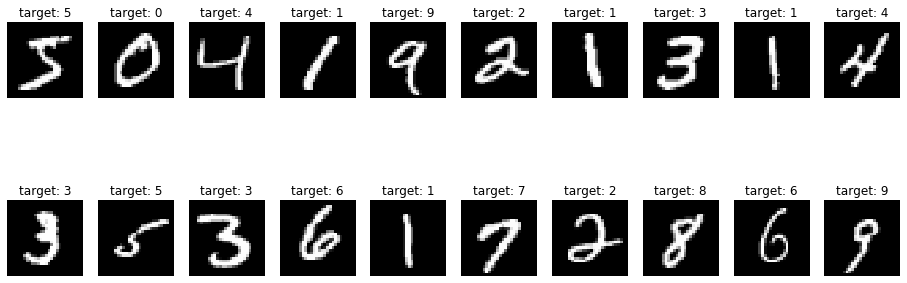

In [4]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i % 10].imshow(X[i].reshape((28, 28)), cmap="gray")
    axes[i//10, i % 10].axis("off")
    axes[i//10, i % 10].set_title(f"target: {y[i]}")

In [7]:
digits = 10
examples = y.shape[1]

y = y.reshape(1, examples)

Y = np.eye(digits)[y.astype("int32")]
Y = Y.T.reshape(digits, examples)

In [9]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y[:, :m], Y[:, m:]

shuffle_index = np.random.permutation(m)
print(shuffle_index)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]
print(X_train.shape)
print(Y_train.shape)

[43613 41754  9415 ...  7118 53872  3751]
(784, 60000)
(10, 60000)


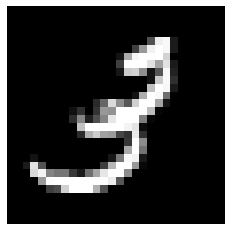

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [11]:
plt.imshow(X_train[:, 12].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()
Y_train[:, i]

### Model building

#### Sigmoid Activation Function

y-hat (or output of nodes) is sigmoid (dot product of weight and input "x" + bias)
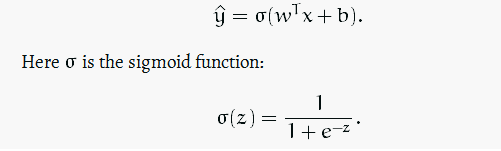

In [12]:
def sigmoid(x):
    return 1. / (1+np.exp(-x))

#### Coss-entropy Loss (aka Cost, Error) Function

For "n" classes and single samples or for "n" digits and single image, the formula is:
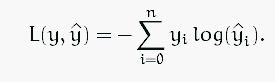

But for "n" classes and multiple (m) samples or for "n" digits and multiple single image, the formula is:
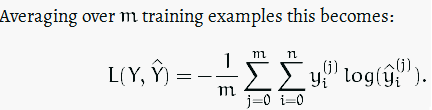

In [13]:
def compute_multiclass_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum
    return L

#### Back-propagation using Gradient Descent Algorithm

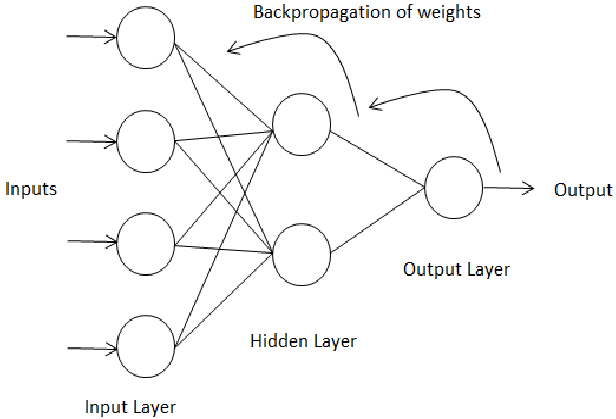

Back-progagation is just a way of propagating the total loss back into the neural network to know how much of the loss every node is responsible for and subsequently updating the weights in such a way that minimizes the loss by giving the nodes with higher error rater lower weights and vice versa.

#### Gradient Descent

Gradient Descent is a first-order iterative optimization algoritm for finding a local minimum of a differentiable function. To find a local minimmum of a function using gradient descend, we take steps proportional to the negative of the gradient of the function at the current point.

Formula: *new weight = prev.weight - learning_rate * gradient*

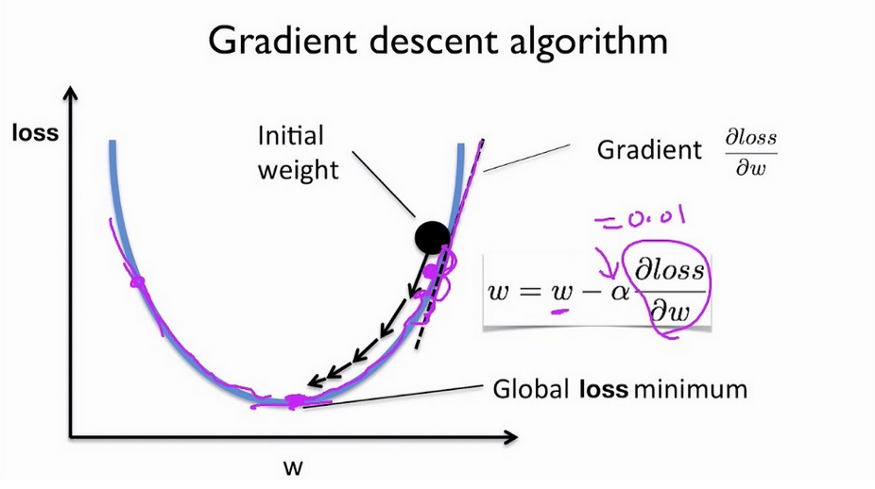

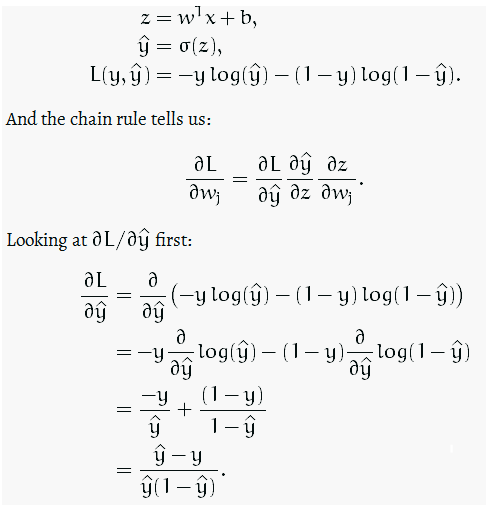

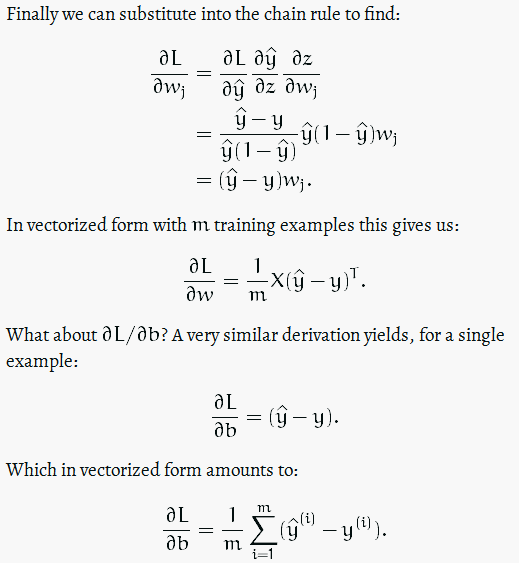

### Model training

In [14]:
n_x = X_train.shape[0]
n_h = 64
digits = 10
learning_rate = 1
epochs = 2000

In [15]:
# weights and bias
W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

In [17]:
for i in range(epochs):
    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    
    cost = compute_multiclass_loss(Y, A2)
    
    dZ2 = A2 - Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    
    if i % 100 == 0:
        print ("Epoch: {}, cost: {}".format(i, cost))
print("Final cost:",cost)

Epoch: 0, cost: 7.829309253751809
Epoch: 100, cost: 0.6977630894215568
Epoch: 200, cost: 0.5340235539313367
Epoch: 300, cost: 0.46139797056845216
Epoch: 400, cost: 0.41696902171787065
Epoch: 500, cost: 0.38573517806301466
Epoch: 600, cost: 0.36197773949481454
Epoch: 700, cost: 0.34299894512737666
Epoch: 800, cost: 0.3272927710281535
Epoch: 900, cost: 0.3139908081600399
Epoch: 1000, cost: 0.3025098959658362
Epoch: 1100, cost: 0.2924239760978216
Epoch: 1200, cost: 0.2834288303983797
Epoch: 1300, cost: 0.27530812253528697
Epoch: 1400, cost: 0.2679064895462065
Epoch: 1500, cost: 0.26111022779856324
Epoch: 1600, cost: 0.2548336577875287
Epoch: 1700, cost: 0.24900935486857975
Epoch: 1800, cost: 0.24358133082937727
Epoch: 1900, cost: 0.23850182139511483
Final cost: 0.23377646171873206


In [19]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 947    0   11    4    2   15    8    3   11    4]
 [   0 1107    6    1    1    4    4    9    3    7]
 [   5    5  938   16    3    3    4   31    6    2]
 [   3    5   14  922    1   33    1   11   24   13]
 [   0    2    7    0  906    9   11    8    8   32]
 [   9    2    3   23    1  770   19    0   24   14]
 [  10    2   13    2   15   18  904    0   10    2]
 [   3    1   16   18    3    8    1  942    2   23]
 [   2   11   21   18    6   21    6    2  869   15]
 [   1    0    3    6   44   11    0   22   17  897]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1005
           1       0.98      0.97      0.97      1142
           2       0.91      0.93      0.92      1013
           3       0.91      0.90      0.91      1027
           4       0.92      0.92      0.92       983
           5       0.86      0.89      0.88       865
           6       0.94      0.93      0.93       976
           7       0.92      0.93   